# Text analysis workbook


[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1ICa2nh3mbflJCrJ4oKNUHWTZ9_vTJw8F?usp=sharing) (Fix link later!)

In [ ]:
# TODO add colab explanation

# Part 1: Set-up
At the beginning of this notebook, we need to set up all of the libraries/packages (reusable python-programs other people have written) that we are going to use during. For this we use a common python-package manager called 'pip'. Pip takes care of downloading the right versions, and installing them on our computer, which in this case is a server that's standing in a google

In [139]:
!pip install pandas
!pip install pyalex
!pip install umap-learn
!pip install datamapplot
!pip install sentence-transformers
!pip install seaborn
!pip install genieclust
!pip install litellm
!pip install opinionated


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  Using cached opinionated-0.0.3.0-py3-none-any.whl.metadata (2.8 kB)
  Using cached colormaps-0.4.2-py3-none-any.whl.metadata (4.8 kB)
Using cached opinionated-0.0.3.0-py3-none-any.whl (16.1 MB)
Using cached colormaps-0.4.2-py3-none-any.whl (727 kB)

[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


# Part 2: Imports

In [205]:

# Our data-handling library:
import pandas as pd

# Our visualisation library:
import matplotlib.pyplot as plt
import seaborn as sns


# Our numerical library:
import numpy as np

import os


import pyalex



# Our mapping library:
import umap
import datamapplot

# Libraries for llms
import sentence_transformers
import litellm

# Library for prettier graphics:
import opinionated
plt.style.use('opinionated_rc')
import colormaps as colormaps #https://pratiman-91.github.io/colormaps/



from utils.openalex_utils import openalex_url_to_pyalex_query, process_records_to_df, get_records_from_dois, openalex_url_to_filename, download_openalex_records

# Part 3: Getting data

## Part 3.1 OpenAlex-datasets.

In [324]:
openalex_url = 'https://openalex.org/works?page=1&filter=primary_location.source.id:s255146,publication_year:2005-2025'

dataset_df = download_openalex_records(openalex_url,
                                       reduce_sample=True, 
                                       sample_reduction_method="n random samples", 
                                       sample_size=5000, 
                                       seed_value="42")


dataset_df['text'] = dataset_df['title'] + dataset_df['abstract'] 
# We filter for works that have an abstract:
dataset_df = dataset_df[dataset_df['text'].str.len() > 10]

text_data = list(dataset_df['text'])
year_data = dataset_df['publication_year']
title_data = dataset_df['title']

used_dataset = "OpenAlex-query"






Input: https://openalex.org/works?page=1&filter=primary_location.source.id:s255146,publication_year:2005-2025
Starting data projection pipeline
Filename: primary_location_source_id_s255146__publication_year_2005-2025__20250902_130001
Requesting 6749 entries from query 1/1 (expecting to download 5000)...
Attempting PyAlex sampling: 5000 from 6749 (seed=42)
PyAlex sampling successful: got 5000 records (requested 5000)
Query completed in 35.61 seconds
Total records collected: 5000
Expected to download: 5000
Available from all queries: 6749
Sample method used: n random samples
Reduce sample enabled: True
Seed value: 42


We can take a look at the data, by displaying the dataframe-object:

In [325]:
display(dataset_df)

,id,doi,title,display_name,relevance_score,publication_year,publication_date,ids,language,primary_location,...,abstract_inverted_index_v3,cited_by_api_url,counts_by_year,updated_date,created_date,fulltext_origin,abstract,parsed_publication,query_index,text
0,https://openalex.org/W2080857449,https://doi.org/10.1007/s11229-014-0606-z,Functional kinds: a skeptical look,Functional kinds: a skeptical look,0.999736,2014,2014-12-16,{'openalex': 'https://openalex.org/W2080857449...,en,"{'is_oa': False, 'landing_page_url': 'https://...",...,None,https://api.openalex.org/works?filter=cites:W2...,"[{'year': 2024, 'cited_by_count': 1}, {'year':...",2025-08-16T11:15:00.730404,2016-06-24,NaN,,Synthese,0,Functional kinds: a skeptical look
1,https://openalex.org/W2032007345,https://doi.org/10.1007/s11229-009-9625-6,Philosophical research on cognition,Philosophical research on cognition,0.999563,2009,2009-07-30,{'openalex': 'https://openalex.org/W2032007345...,en,"{'is_oa': False, 'landing_page_url': 'https://...",...,None,https://api.openalex.org/works?filter=cites:W2...,[],2025-02-06T15:21:32.008883,2016-06-24,ngrams,,Synthese,0,Philosophical research on cognition
2,https://openalex.org/W2005144534,https://doi.org/10.1007/s11229-012-0146-3,Classical population genetics and the semantic...,Classical population genetics and the semantic...,0.999485,2012,2012-07-30,{'openalex': 'https://openalex.org/W2005144534...,en,"{'is_oa': False, 'landing_page_url': 'https://...",...,None,https://api.openalex.org/works?filter=cites:W2...,"[{'year': 2023, 'cited_by_count': 1}, {'year':...",2025-08-17T06:41:00.218008,2016-06-24,ngrams,,Synthese,0,Classical population genetics and the semantic...
3,https://openalex.org/W3118001131,https://doi.org/10.1007/s11229-020-03002-6,"Ontology, neural networks, and the social scie...","Ontology, neural networks, and the social scie...",0.998584,2020,2020-12-28,{'openalex': 'https://openalex.org/W3118001131...,en,"{'is_oa': True, 'landing_page_url': 'https://d...",...,None,https://api.openalex.org/works?filter=cites:W3...,"[{'year': 2024, 'cited_by_count': 1}, {'year':...",2025-08-24T15:39:09.937520,2021-01-05,pdf,Abstract The ontology of social objects and fa...,Synthese,0,"Ontology, neural networks, and the social scie..."
4,https://openalex.org/W4392763858,https://doi.org/10.1007/s11229-024-04529-8,HOTT and heavy: higher-order thought theory an...,HOTT and heavy: higher-order thought theory an...,0.998513,2024,2024-03-13,{'openalex': 'https://openalex.org/W4392763858...,en,"{'is_oa': False, 'landing_page_url': 'https://...",...,None,https://api.openalex.org/works?filter=cites:W4...,"[{'year': 2024, 'cited_by_count': 1}]",2025-08-25T15:08:07.004158,2024-03-14,NaN,,Synthese,0,HOTT and heavy: higher-order thought theory an...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,https://openalex.org/W4292543249,https://doi.org/10.1007/s11229-022-03773-0,Natural language quantification is not polysemous,Natural language quantification is not polysemous,0.263968,2022,2022-08-20,{'openalex': 'https://openalex.org/W4292543249...,en,"{'is_oa': True, 'landing_page_url': 'https://d...",...,None,https://api.openalex.org/works?filter=cites:W4...,"[{'year': 2025, 'cited_by_count': 1}]",2025-08-23T18:53:56.788511,2022-08-22,pdf,Abstract The paper argues that natural languag...,Synthese,0,Natural language quantification is not polysem...
4996,https://openalex.org/W1670223953,https://doi.org/10.1007/s11229-015-0886-y,Relationalism about perceptible properties and...,Relationalism about perceptible properties and...,0.263906,2015,2015-09-14,{'openalex': 'https://openalex.org/W1670223953...,en,"{'is_oa': False, 'landing_page_url': 'https://...",...,None,https://api.openalex.org/works?filter=cites:W1...,"[{'year': 2024, 'cited_by_count': 1}, {'year':...",2025-08-21T11:59:36.617458,2016-06-24,pdf,,Synthese,0,Relationalism about perceptible properties and...
4997,https://openalex.org/W1993650192,http

# Part 3.2 Stanford-Encyclopedia dataset

In [255]:
import requests
import zipfile
from pathlib import Path

# Download and extract if needed
stanford_zip = Path("stanford-encyclopedia.zip")
stanford_folder = Path("stanford-encyclopedia")
if not stanford_zip.exists():
    zip_data = requests.get("https://github.com/MNoichl/data-driven-philosophy-GAP2025/raw/refs/heads/main/stanford-encyclopedia.zip").content
    with zipfile.ZipFile(zipfile.io.BytesIO(zip_data)) as zip_ref:
        zip_ref.extractall(".")

# Load data
text_data = [open(f, encoding='utf-8').read() for f in stanford_folder.glob("*.md")]
title_data = [f.stem for f in stanford_folder.glob("*.md")]
# Extract year data from copyright strings in the text files
import re

year_data = []
for text in text_data:
    # Look for "Copyright © YYYY" pattern at the beginning of the text
    match = re.search(r'Copyright © (\d{4})', text)  # Search in first 1000 chars
    if match:
        year_data.append(int(match.group(1)))
    else:
        year_data.append(None)  # If no copyright year found

used_dataset = "Stanford Encyclopedia"

# Part 4: Using a language model 
We are now going to use a text-embedding model (a relatively small large language model) to transform the texts into a format which is easier to analyze mathematically. 


(BERT explaination.)  

https://www.sbert.net/docs/sentence_transformer/pretrained_models.html 

In [339]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('Qwen/Qwen3-Embedding-0.6B') #thenlper/gte-small
embeddings = model.encode(text_data,show_progress_bar=True)


Batches: 100%|██████████| 156/156 [02:36<00:00,  1.00s/it]


This is what the resulting embeddings look like:


In [340]:
print(embeddings)

[[-0.00952364 -0.044348   -0.01717542 ...  0.00388275  0.0220993
   0.03617595]
 [ 0.00659698 -0.01229807 -0.00901286 ...  0.03690989 -0.03316965
   0.0292486 ]
 [-0.05620954  0.00127713 -0.01443122 ... -0.01201152 -0.01324686
   0.0316207 ]
 ...
 [ 0.01589348 -0.00037991 -0.0125677  ...  0.01037861 -0.00021663
  -0.01045285]
 [ 0.02568372 -0.03458415 -0.01285932 ... -0.00057384 -0.03632577
   0.01653321]
 [ 0.03608664 -0.01768797 -0.01384099 ...  0.01083319  0.00871221
   0.00442127]]


# Part 5: doing dimensionality reduction


In [341]:
import umap


reducer = umap.UMAP(n_components=2, random_state=42,metric='cosine')
umap_embeddings = reducer.fit_transform(embeddings)

print(umap_embeddings)


/Users/Noich001/Desktop/workbooks_GAP_workshop/venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


[[ 8.563498  -1.0896418]
 [10.900492   1.8750414]
 [ 9.436348   3.0766199]
 ...
 [ 9.563874  -3.0928488]
 [ 8.861391  -2.257042 ]
 [ 9.49329   -1.3421302]]


We can also look at the embeddings as a scatter-plot. Each data-point is one of our texts:

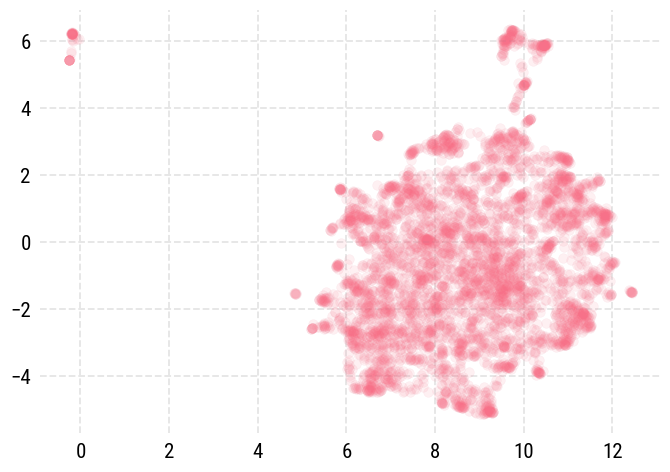

In [342]:
plt.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1],alpha=0.1)
plt.show()

# Part 5: Clustering 

In [350]:
import genieclust

reducer = umap.UMAP(n_components=30, random_state=42,metric='cosine')
umap_embeddings_high_dim = reducer.fit_transform(embeddings)

g = genieclust.Genie(n_clusters=15, gini_threshold=0.3)
cluster_labels = g.fit_predict(umap_embeddings_high_dim)
print(cluster_labels[0:20])

/Users/Noich001/Desktop/workbooks_GAP_workshop/venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


[ 0  1  2  3  1  4  5  4  6  7  3  8  0  9  2 10  4 11  0  2]


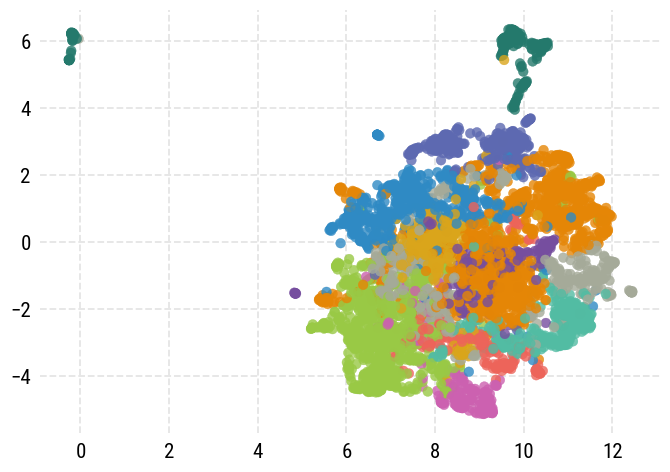

In [351]:
plt.scatter(x=umap_embeddings[:, 0], 
            y=umap_embeddings[:, 1],
            c=cluster_labels,
            cmap=colormaps.vivid,
            alpha=0.8)

# Part 6: Labeling clusters

In [352]:
# Read OpenAI API key from API_KEYS.txt file
with open('API_KEYS.txt', 'r') as file:
    for line in file:
        if line.startswith('OPENAI:'):
            openai_api_key = line.split(':', 1)[1].strip()
            break
    else:
        raise ValueError("OPENAI API key not found in API_KEYS.txt")

os.environ["OPENAI_API_KEY"] = openai_api_key

In [353]:
from litellm import completion
import pandas as pd
import random
import json

# Create a function to label clusters using OpenAI
def label_cluster(cluster_texts, cluster_id, n_samples=10):
    # Randomly sample representative texts from the cluster (max 10 for efficiency)
    sample_size = min(10, len(cluster_texts))
    sample_texts = random.sample(cluster_texts, sample_size)
    
    # Truncate texts to 100 characters
    sample_texts = [text[:1000] + "..." if len(text) > 1000 else text for text in sample_texts]
    
    prompt = f"""
    Below are randomly sampled texts from cluster {cluster_id}. Please analyze these texts and provide:
    1. A short descriptive label (2-4 words) for the area of philosophy that the texts are from.
    2. A brief description of the main theme

    Texts:
    {chr(10).join([f"- {text[:200]}..." if len(text) > 200 else f"- {text}" for text in sample_texts])}
    
    Please respond in JSON format:
    {{
        "label": "[your label]",
        "description": "[your description]"
    }}
    """
    
    messages = [{"content": prompt, "role": "user"}]
    response = completion(model="openai/gpt-5", messages=messages, response_format={"type": "json_object"})
    return response.choices[0].message.content

# Group texts by cluster
cluster_groups = {}
for i, label in enumerate(cluster_labels):
    if label not in cluster_groups:
        cluster_groups[label] = []
    cluster_groups[label].append(text_data[i])

# Label each cluster
cluster_info = {}
for cluster_id, texts in cluster_groups.items():
    print(f"Labeling cluster {cluster_id} ({len(texts)} texts)...")
    label_info = label_cluster(texts, cluster_id, n_samples=5)
    cluster_info[cluster_id] = label_info
    print(f"Cluster {cluster_id}: {label_info}\n")

# Create a summary dataframe
cluster_summary = []
for cluster_id, info in cluster_info.items():
    # Parse the JSON response
    try:
        parsed_info = json.loads(info)
        label = parsed_info.get('label', 'Unknown')
        description = parsed_info.get('description', 'No description available')
    except (json.JSONDecodeError, TypeError):
        # Fallback if JSON parsing fails
        label = f"Cluster {cluster_id}"
        description = str(info)
    
    cluster_summary.append({
        'Cluster_ID': cluster_id,
        'Size': len(cluster_groups[cluster_id]),
        'Label': label,
        'Description': description
    })

cluster_df = pd.DataFrame(cluster_summary)
cluster_df

Labeling cluster 0 (692 texts)...
Cluster 0: {
  "label": "Contemporary Epistemology",
  "description": "Debates on the nature, sources, and norms of knowledge and justification—covering self-knowledge, evidence, perception, virtue/dispositional accounts, and understanding—alongside responses to skepticism (closure and hinge views), the affective dimensions of epistemic life, and arguments about a priori elements in evidential reasoning."
}

Labeling cluster 1 (586 texts)...
Cluster 1: {
  "label": "Philosophy of Cognitive Science",
  "description": "Interdisciplinary analyses of cognition and experience using computational, mechanistic, and phenomenological frameworks. Focus on how perception, memory, emotion, pain, and social learning are modeled and explained, and on the epistemic issues they raise (e.g., hallucination, misidentification, direct perception), with emphasis on integrating psychology and neuroscience."
}

Labeling cluster 2 (315 texts)...
Cluster 2: {
  "label": "Causa

,Cluster_ID,Size,Label,Description
0,0,692,Contemporary Epistemology,"Debates on the nature, sources, and norms of k..."
1,1,586,Philosophy of Cognitive Science,Interdisciplinary analyses of cognition and ex...
2,2,315,"Causation, Mechanisms, Emergence",Explores how causal structure and mechanistic ...
3,3,358,Scientific Realism and Objectivity,Cluster centers on philosophy of science and m...
4,4,733,Philosophy of Logic and Mathematics,Foundational and methodological debates about ...
5,5,149,Philosophy of Language,"Semantics and pragmatics of communication, foc..."
6,6,189,Philosophy of Physics,Conceptual and methodological analysis of mode...
7,7,232,Environmental and Applied Science,Technical studies on environmental systems and...
8,8,303,Knowledge and Meaning,Explores how beliefs and assertions are justif...
9,9,191,Bayesian Confirmation Theory,Formal epistemology and philosophy of science ...


In [354]:
# Create a labels list from cluster_labels and the labeled cluster descriptions
labels_list = []
for cluster_id in cluster_labels:
    # Find the corresponding label from the cluster_df
    cluster_row = cluster_df[cluster_df['Cluster_ID'] == cluster_id]
    if not cluster_row.empty:
        label = cluster_row.iloc[0]['Label']
    else:
        label = f"Cluster {cluster_id}"
    labels_list.append(label)


# Part 7: Visualizing

<InteractiveFigure width=100% height=800>
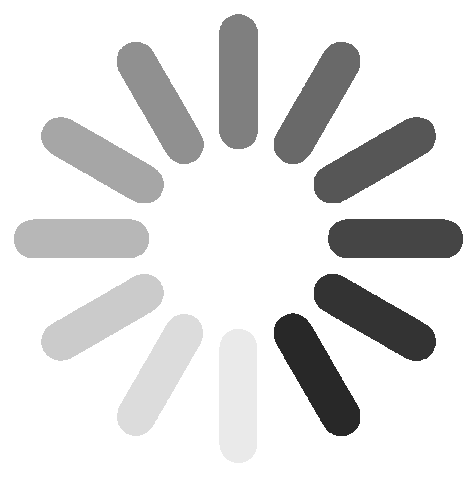

In [355]:
import datamapplot

datamapplot.create_interactive_plot(
    umap_embeddings,
    labels_list,  # label layer
    hover_text=title_data,  # hover_text must be the 2nd positional

    title=used_dataset
)

In [356]:
# Prepare data for streamgraph visualization
# Convert the year_data and clusters into the format expected by plot_streamgraph

# Get unique years and sort them
years_sorted = sorted(set(year_data))
X_stream = np.array(years_sorted)

# Get unique clusters and their labels
unique_clusters = sorted(set(cluster_labels))
cluster_labels_to_plot = []
for cluster_id in unique_clusters:
    if cluster_id in cluster_df['Cluster_ID'].values:
        label = cluster_df[cluster_df['Cluster_ID'] == cluster_id]['Label'].iloc[0]
        cluster_labels_to_plot.append(label)
    else:
        cluster_labels_to_plot.append(f"Cluster {cluster_id}")

# Create Y matrix: each row is a cluster's values over time
Y_stream = []
for cluster_id in unique_clusters:
    cluster_values = []
    for year in years_sorted:
        # Count documents in this cluster for this year
        cluster_count = sum(1 for i, (doc_year, doc_cluster) in enumerate(zip(year_data, cluster_labels)) 
                           if doc_year == year and doc_cluster == cluster_id)
        cluster_values.append(cluster_count)
    Y_stream.append(cluster_values)

Y_stream = np.array(Y_stream)

print(f"Streamgraph data prepared:")
print(f"X (years): {len(X_stream)} points from {X_stream[0]} to {X_stream[-1]}")
print(f"Y (clusters): {Y_stream.shape[0]} clusters × {Y_stream.shape[1]} time points")
print(f"Cluster labels: {cluster_labels_to_plot[:3]}...")  # Show first 3 labels


Streamgraph data prepared:
X (years): 21 points from 2005 to 2025
Y (clusters): 15 clusters × 21 time points
Cluster labels: ['Contemporary Epistemology', 'Philosophy of Cognitive Science', 'Causation, Mechanisms, Emergence']...


In [357]:
# Normalize the counts to show proportions
Y_stream_normalized = Y_stream / Y_stream.sum(axis=0, keepdims=True)

# Double check these sum to one
print("Column sums (should all be 1.0):")
column_sums = Y_stream_normalized.sum(axis=0)
print(f"Min sum: {column_sums.min():.6f}")
print(f"Max sum: {column_sums.max():.6f}")
print(f"All sums equal 1.0: {np.allclose(column_sums, 1.0)}")
# Y_stream_normalized

Column sums (should all be 1.0):
Min sum: 1.000000
Max sum: 1.000000
All sums equal 1.0: True


<Axes: >

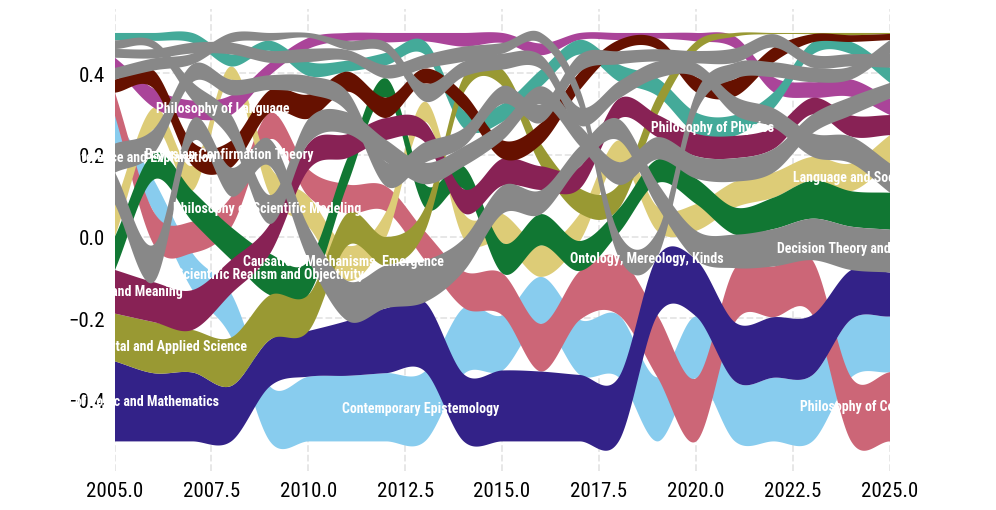

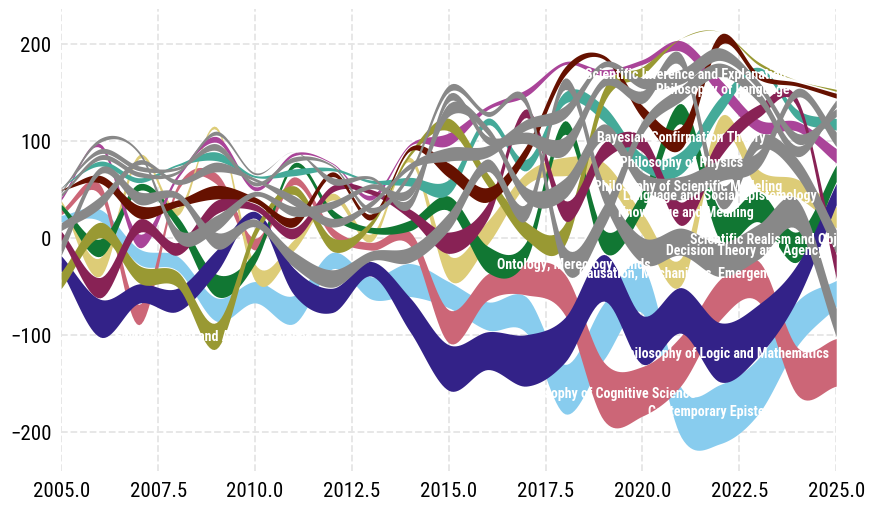

In [360]:
from utils.streamgraph import plot_streamgraph
import numpy as np



# 1) straight edges
plot_streamgraph(X_stream, Y_stream_normalized, labels=cluster_labels_to_plot,
                    sorted_streams=True,
                    margin_frac=0.0,
                    smooth_window=2,
                    cmap=colormaps.safe,
                    curve_samples=200)

# 2) curved edges only, values unchanged
plot_streamgraph(X_stream, Y_stream, labels=cluster_labels_to_plot,
                    sorted_streams=True,
                    margin_frac=0.1,
                    smooth_window=1,
                    cmap=colormaps.safe,
                    curve_samples=16)